## IMPORTING THE REQUIRED LIBRARIES

In [2]:
!pip install inltk
import re
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
from collections import Counter
from bs4 import BeautifulSoup
import requests
!pip3 install beautifulsoup4
!pip3 install requests
!pip3 install wordcloud
from wordcloud import WordCloud, STOPWORDS
!pip install stanza
import stanza
stanza.download('hi')
nlp = stanza.Pipeline('hi') 
!pip3 install nltk
import nltk
nltk.download('indian')
nltk.download('punkt')

import sys
sys.setrecursionlimit(15000)

from nltk.tag import tnt
from nltk.corpus import indian

!pip install indic-transliteration
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

stanza.download('hi')
hi_nlp = stanza.Pipeline('hi')

from inltk.inltk import tokenize
from inltk.inltk import setup
setup('hi')





2022-05-13 01:17:58 INFO: Downloading default packages for language: hi (Hindi)...
2022-05-13 01:17:59 INFO: File exists: /home/hardk/stanza_resources/hi/default.zip
2022-05-13 01:18:01 INFO: Finished downloading models and saved to /home/hardk/stanza_resources.


2022-05-13 01:18:02 INFO: Loading these models for language: hi (Hindi):
| Processor | Package |
-----------------------
| tokenize  | hdtb    |
| pos       | hdtb    |
| lemma     | hdtb    |
| depparse  | hdtb    |

2022-05-13 01:18:02 INFO: Use device: cpu
2022-05-13 01:18:02 INFO: Loading: tokenize
2022-05-13 01:18:02 INFO: Loading: pos
2022-05-13 01:18:02 INFO: Loading: lemma
2022-05-13 01:18:02 INFO: Loading: depparse
2022-05-13 01:18:02 INFO: Done loading processors!


[nltk_data] Downloading package indian to /home/hardk/nltk_data...
[nltk_data]   Package indian is already up-to-date!
[nltk_data] Downloading package punkt to /home/hardk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2022-05-13 01:18:09 INFO: Downloading default packages for language: hi (Hindi)...
2022-05-13 01:18:09 INFO: File exists: /home/hardk/stanza_resources/hi/default.zip
2022-05-13 01:18:10 INFO: Finished downloading models and saved to /home/hardk/stanza_resources.


2022-05-13 01:18:11 INFO: Loading these models for language: hi (Hindi):
| Processor | Package |
-----------------------
| tokenize  | hdtb    |
| pos       | hdtb    |
| lemma     | hdtb    |
| depparse  | hdtb    |

2022-05-13 01:18:11 INFO: Use device: cpu
2022-05-13 01:18:11 INFO: Loading: tokenize
2022-05-13 01:18:11 INFO: Loading: pos
2022-05-13 01:18:11 INFO: Loading: lemma
2022-05-13 01:18:11 INFO: Loading: depparse
2022-05-13 01:18:12 INFO: Done loading processors!


RuntimeError: This event loop is already running

Done!


### WEB CRAWLING (SCRAPING)

In [3]:
url = 'https://www.deepawali.co.in/nibandh-essay-hindi'
req = requests.get(url)
#print(req.content)
html_content = req.content
soup = BeautifulSoup(html_content, 'html.parser')
#pprint(soup.prettify())

In [4]:
def get_sentences(url, corpus, sentences, links):
    req = requests.get(url)
    html_content = req.content
    soup = BeautifulSoup(html_content, 'html.parser')
    links_corpus = soup.find_all('a')
    for i in links_corpus:
        link = i.get('href')
        if(link is not None):
            if(link.startswith('https://www.deepawali.co.in')):
                # print(link)
                links.append(link)
                req = requests.get(link)
                html_content = req.content
                soup = BeautifulSoup(html_content, 'html.parser')
                content_corpus = soup.find_all('p')
                # print(news_corpus[0].text)
                for j in content_corpus:
                    corpus = corpus+j.text
                    # for better tokenization
                    corpus = corpus.replace(".", "।")
                    # for better tokenization
                    corpus = corpus.replace("?", "।")
                    # for better tokenization
                    corpus = corpus.replace("!", "।")
                    sentences = corpus.split("।")
                    # print(sentences)
                    # print("Sentences length : ", len(sentences))
                    # print("URLS length : ", len(links))
                    if(len(sentences) > 500):
                        return corpus
    #print("Calling the function again with the link : ", links[-1])
    corpus = get_sentences(links[-1], corpus, sentences, links)
    return corpus


In [5]:
corpus = ""
links = []
sentences = []
temp=[]
links.append(url)
corpus = get_sentences(url, corpus, sentences, links)

#print(len(sentences))

In [6]:
# for sentence in sentences:
#     print(sentence)

#print(corpus)
    
    

### CLEANING THE CORPUS

In [7]:
corpus = re.sub("[0-9][A-Z]|[a-z]", "", corpus)
#print(corpus_text_hindi)

corpus=corpus.replace("|","")
corpus=corpus.replace(")","")
corpus=corpus.replace("(","")
sentences = corpus.split("।")
sentences = [sentence for sentence in sentences if sentence!=""]
sentences = [sentence for sentence in sentences if sentence!=" "]

# for sentence in sentences:
#     print(sentence)
clean_corpus = ' '.join(sentences)+' '



### WORD TOKENIZATION

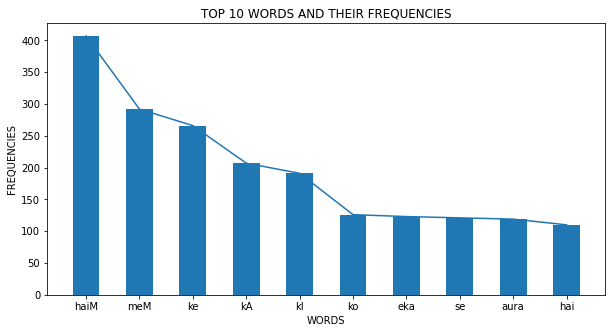

In [12]:
words =[]
for sentence in sentences:
    words.extend(sentence.split(" "))

words=[word for word in words if word]
#print(words)
word_count=Counter(words)
#print(words_counter.most_common(10))

word_count_dict={}
for word in words: 
  word_count_dict.setdefault(transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS),0 )
  word_count_dict[transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS)]= word_count_dict[transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS)]+1
#print(word_count_dict)

word_count=Counter(word_count_dict)
#print(word_count)
fig = plt.figure(figsize=(10,5))
plt.xlabel("WORDS")
plt.ylabel("FREQUENCIES")
plt.title("TOP 10 WORDS AND THEIR FREQUENCIES")
plt.bar([x for x,y in word_count.most_common(10)], [y for x,y in word_count.most_common(10)], width=0.5)
plt.plot([x for x,y in word_count.most_common(10)], [y for x,y in word_count.most_common(10)])
plt.show()

### POS TAGGING

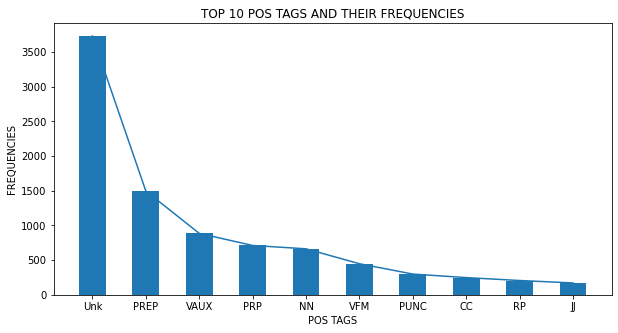

In [13]:
from nltk.tag import tnt
from nltk.corpus import indian

words_string=' '.join(words)+' '


train_data = indian.tagged_sents('hindi.pos')
tnt_pos_tagger = tnt.TnT()
tnt_pos_tagger.train(train_data)

tagged_words_list=[]
for word in words:
    tagged_words_list.extend(tnt_pos_tagger.tag(nltk.word_tokenize(word)))
    #print(tagged_words)

#print(tagged_words_list)
tagged_words_counter= Counter([tagged_word[1] for tagged_word in tagged_words_list])
#print(tagged_words_counter)
fig = plt.figure(figsize=(10,5))
plt.xlabel("POS TAGS")
plt.ylabel("FREQUENCIES")
plt.title("TOP 10 POS TAGS AND THEIR FREQUENCIES")
plt.bar([x for x,y in tagged_words_counter.most_common(10)], [y for x,y in tagged_words_counter.most_common(10)], width=0.5)
plt.plot([x for x,y in tagged_words_counter.most_common(10)], [y for x,y in tagged_words_counter.most_common(10)])
plt.show()


### STOP WORDS

[('philma', 108), ('Apako', 50), ('kahAnI', 40), ('dIpAvalI', 34), ('hiMdI', 33), ('hai,', 30), ('haiM,', 30), ('kAsTa', 29), ('jAtA', 27), ('hama', 27)]


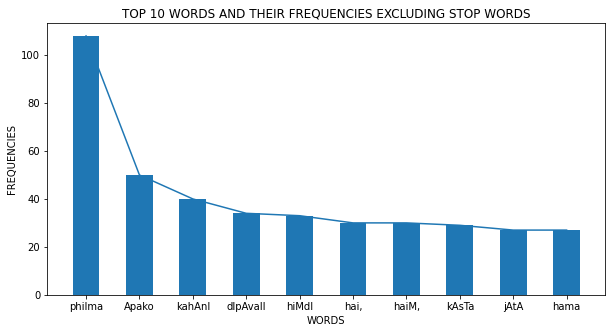

In [19]:
HINDI_STOP_WORDS = ["के", "का", "एक", "में", "की", "है", "यह", "और", "से", "हैं", "को", "पर", "इस", "होता", "कि", "जो", "कर", "मे", "गया", "करने", "किया", "लिये", "अपने", "ने", "बनी", "नहीं", "तो", "ही", "या", "एवं", "दिया", "हो", "इसका", "था", "द्वारा", "हुआ", "तक", "साथ", "करना", "वाले", "बाद", "लिए", "आप", "कुछ", "सकते", "किसी", "ये", "इसके", "सबसे",
                    "इसमें", "थे", "दो", "होने", "वह", "वे", "करते", "बहुत", "कहा", "वर्ग", "कई", "करें", "होती", "अपनी", "उनके", "थी", "यदि", "हुई", "जा", "ना", "इसे", "कहते", "जब", "होते", 'कोई', "हुए", "व", "न", "अभी", "जैसे", "सभी", "करता", "उनकी", "तरह", "उस", "आदि", "कुल", "एस", "रहा", "इसकी", "सकता", "रहे", 'उनका', "इसी", "रखें", "अपना", "पे", "उसके", "भी", "तथा"]
words_without_stopwords = []
for word in words:
    if word not in HINDI_STOP_WORDS:
        words_without_stopwords.append(word)

words_without_stopwords=[word for word in words_without_stopwords if word!='–']
word_count_dict={}
for word in words_without_stopwords: 
  word_count_dict.setdefault(transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS),0 )
  word_count_dict[transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS)]= word_count_dict[transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS)]+1

#print(word_count_dict)

counter_without_stopwords = Counter(words_without_stopwords)
counter_without_stopwords = Counter(word_count_dict)
print(counter_without_stopwords.most_common(10))
fig = plt.figure(figsize=(10,5))
plt.xlabel("WORDS")
plt.ylabel("FREQUENCIES")
plt.title("TOP 10 WORDS AND THEIR FREQUENCIES EXCLUDING STOP WORDS")
plt.bar([x for x,y in counter_without_stopwords.most_common(10)], [y for x,y in counter_without_stopwords.most_common(10)], width=0.5)
plt.plot([x for x,y in counter_without_stopwords.most_common(10)], [y for x,y in counter_without_stopwords.most_common(10)])
plt.show()
# print(token_counter_hindi_without_stopwords)


### LEMMATIZATION & STEMMIZATION

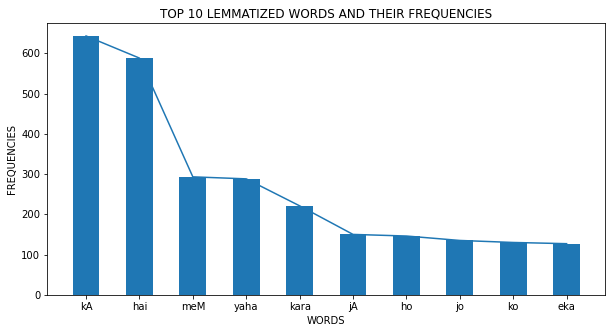

In [15]:

hindi_doc = hi_nlp(clean_corpus) 

lemmatized_list=[]
for sentence in hindi_doc.sentences:
  for word in sentence.words:
    lemmatized_list.append(word.lemma)
lemmatized_counter=Counter(lemmatized_list)

lemmatized_list=[lemma for lemma in lemmatized_list if lemma!=',']

word_count_dict={}
for word in lemmatized_list: 
  word_count_dict.setdefault(transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS),0 )
  word_count_dict[transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS)]= word_count_dict[transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS)]+1

lemmatized_counter=Counter(word_count_dict)
#print(lemmatized_counter.most_common(10))
fig = plt.figure(figsize=(10,5))
plt.xlabel("WORDS")
plt.ylabel("FREQUENCIES")
plt.title("TOP 10 LEMMATIZED WORDS AND THEIR FREQUENCIES")
plt.bar([x for x,y in lemmatized_counter.most_common(10)], [y for x,y in lemmatized_counter.most_common(10)], width=0.5)
plt.plot([x for x,y in lemmatized_counter.most_common(10)], [y for x,y in lemmatized_counter.most_common(10)])
plt.show()


In [16]:
# word_count_dict={}
# for word in words_without_stopwords: 
#   word_count_dict.setdefault(transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS),0 )
#   word_count_dict[transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS)]= word_count_dict[transliterate(word, sanscript.DEVANAGARI,sanscript.ITRANS)]+1

# print(word_count_dict)

### WORDCLOUD

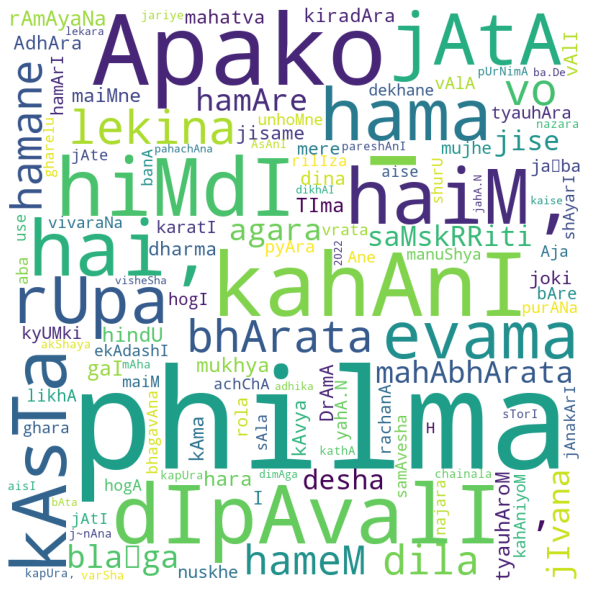

In [17]:
wordcloud = WordCloud(width = 800, height = 800,max_words=120,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate_from_frequencies(counter_without_stopwords)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 

 ## 120 words in the word cloud as these were comprising of approximately 75% of the data(after removing the stop words)
plt.show()